# Pregnancy Prediction Model

In [1]:
# import pandas for feature elimination
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('future.no_silent_downcasting', True) # added because of the auto downcasting done on pd.replace()

In [2]:
xls = pd.ExcelFile('S1Tables.xlsx')
print(xls.sheet_names)  # Lists all sheet names

['HOSPITAL A', 'HOSPITAL B', 'HOSPITAL C', 'HOSPITAL D']


In [3]:
df_all_sheets = pd.read_excel('S1Tables.xlsx', sheet_name=None)

In [4]:
# df_hospitalA
df_hospitalA = df_all_sheets['HOSPITAL A']
# df_hospitalB
df_hospitalB = df_all_sheets['HOSPITAL B']
# df_hospitalC
df_hospitalC = df_all_sheets['HOSPITAL C']
# df_hospitalD
df_hospitalD = df_all_sheets['HOSPITAL D']

hospitals = [df_hospitalA, df_hospitalB, df_hospitalC, df_hospitalD]

# Removes leading/trailing spaces from column names and trims spaces in string values
for i in range(len(hospitals)):
    hospitals[i].columns = hospitals[i].columns.str.strip()


print(f"""Number of columns in;\n Hospital A: {len(df_hospitalA.columns)}\n Hospital B: {len(df_hospitalB.columns)}
 Hospital C: {len(df_hospitalC.columns)}\n Hospital D: {len(df_hospitalD.columns)}""")

Number of columns in;
 Hospital A: 156
 Hospital B: 159
 Hospital C: 159
 Hospital D: 159


**After viewing the number of columns in each df, we see that the column length for each df isn't the same so here we checked what columns are missing and in which df is it missing**

In [6]:
dfs = {'df1': df_hospitalA, 'df2': df_hospitalB, 'df3': df_hospitalC, 'df4': df_hospitalD}

# Get all unique columns across all DataFrames
all_columns = list(set().union(*(df.columns for df in dfs.values())))  # Convert to list

# Create a DataFrame to check which DataFrame contains which column
column_presence = pd.DataFrame(index=all_columns, columns=dfs.keys())

for name, df in dfs.items():
    column_presence[name] = column_presence.index.isin(df.columns)

# Display the presence matrix
print(column_presence)

# Find missing columns per DataFrame
missing_columns = {name: list(set(all_columns) - set(df.columns)) for name, df in dfs.items()}

# Display missing columns for each DataFrame
for name, missing in missing_columns.items():
    print(f"\nColumns missing in {name}: {missing}")


                                 df1   df2   df3   df4
PREGESTATIONAL TYPE I DIABETES  True  True  True  True
sex fetus 1                     True  True  True  True
ID GESTATIONAL DIABETES         True  True  True  True
CHRONIC HYPERTENSION            True  True  True  True
INVERTED UTERUS                 True  True  True  True
...                              ...   ...   ...   ...
MULTIPLE GESTATION              True  True  True  True
MATERNAL EDUCATION              True  True  True  True
MALIGNANT TUMOR                 True  True  True  True
MENTAL DISEASE IN  TREATMENT    True  True  True  True
POLIHIDRAMNIOS                  True  True  True  True

[157 rows x 4 columns]

Columns missing in df1: ['FETUS 1 ADMISSION ICU .1', 'FETUS 1 RECOVERY                              .1', 'Unnamed: 39', 'FETUS 1 MECONIUM ASPIRATION SYNDROME .1']

Columns missing in df2: ['OXYTOCIN']

Columns missing in df3: ['OXYTOCIN']

Columns missing in df4: ['OXYTOCIN']


# There are columns not required to predict mode of delivery

## 1. **Postpartum and Fetal Outcome Columns**
These columns describe events or conditions that occur **after delivery** or are related to the newborn's health. Since they are not available **before delivery**, they cannot be used to predict the mode of delivey.

- **Exitus Fetal**: Indicates fetal death, which is an outcome, not a predictor.
- **FETUS 1 ADMISSION ICU**: Indicates whether the newborn was admitted to the NICU, which is a post-delivery event.
- **FETUS 1 MECONIUM ASPIRATION SYNDROME**: A condition affecting the newborn after delivery.
- **FETUS 1 RECOVERY**: Post-delivery recovery status of the newborn.
- **MATERNAL DEATH**: Indicates whether the mother died during or after childbirth, which is an outcome.
- **POSTPARTUM COMPLICATIONS (e.g., UTERINE ATONY, RETAINED PLACENTA, HEMATOMAL DRAINAGE)**: These occur after delivery and cannot influence the prediction of delivde.

---

## 2. **Columns Related to Substance Abuse and Lifestyle**
While substance abuse and lifestyle factors can impact pregnancy, they are **not directly related** to the mode of delivery. These factors are more relevant to fetal health or maternal complications rather than the decision for vaginal or cesrean delivery.

- **CIGARRETTES PER DAY**: Smoking habits during pregnancy.
- **DAILY ALCOHOL INTAKE**: Alcohol consumption during pregnancy.
- **Cannabis, COCAINE, Heroin, others**: Substance useg pregnancy.

---

## 3. **Columns Related to Fetal Characteristics**
Fetal characteristics (e.g., weight, sex, Apgar scores) are **outcomes** of the delivery process and cannot be used to predict the mode of delivery. These are only known fter the baby is born.

- **weight fetus 1**: Birth weight of the first fetus.
- **apgar fetus 1**: Apgar score at 1 minute after birth.
- **apgar fetus 1 five min**: Apgar score at 5 minutes after birth.
- **pH value fetus 1 umbilical arthery**: Feood pH after delivery.

---

## 4. **Columns Related to Maternal Medical History (Non-Obstetric)**
Certain maternal medical conditions (e.g., epilepsy, mental disease, HIV) are not directly related to the mode of delivery unless they significantly complicate the pregnancy. These columns are more relevant to maternal health management rater than delivery mode prediction.

- **EPILEPSY IN TREATMENT**: Treatment for epilepsy during pregnancy.
- **MENTAL DISEASE IN TREATMENT**: Treatment for mental health conditions during pregnancy.
- **HIV +, HVC +, HVB +**: Infectious diseases that may not directly influence delivery mode.
- **Hemiplegia**: Paralysis of one side of the body.
- **MALIGNANT TUMOR*sence of cancer during pregnancy.

---

## 5. **Columns Related to Diagnostic Tests and Procedures**
Some diagnostic tests and procedures are performed during pregnancy but do not directly influence the mode of delivery. These are more relevant for monioring fetal health or diagnosing conditions.

- **AMNIOCENTESIS**: A prenatal diagnostic test for genetic abnormalities.
- **CORIONIC BIOPSY**: A test to sample placental tissue.
- **Cordocentesis**: A procedure to sample fetal blood.
- **ABNORMAL DOPPLER**: Abnormal flow in the umbilical or uterine arteries.

---

## 6. **Redundant or Unlabeled Columns**
Some columns are either redundant or lack clear cntext, making them unsuitable for predictive modeling.

- **Unnamed: 45, 46, 47**: Unlabeled columns with no clear meaning.
- **TEAR.1**: Likely redundant with the **TEAR**n.
- **OTHERS**: Unspecified conditions or factors.

---

## 7. **Columns Related to Post-Delivery Interventions**
These columns describe interventions or procedures performed **after delvery** and are not relevant to predicting the mode of delivery.

- **MANUAL EXTRACTION OF PLACENTA**: A procedure performed after delivery.
- **HISTERECTOMY**: Removal of the uterus after delivery.
- **BLOOD TRANSFUSION**: Administered after delivery in case of hemorrhage.
- **ARL EMBOLIZATION**: A procedure to stop bleeding after delivery.

---

## 8. **Columns Related to Fetal Malformation or Congenital Conditions**
While fetal malformations can influence pregnancy management, they are not directly relted to the mode of delivery unless they cause complications during labor.

- **FETAL MALFORMATION**: Congenital abnormalities in the fetus.
TAL MALPOSITION**: Position of the fetus in the uterus (e.g., breech).

---

## 9. **Columns Related to Maternal Education and Demographics**
While maternal education and demographics can influece healthcare access, they are **not direct predictors** of the mode of delivery.

- **MATERNAL EDUCATION**: Level of education attained by the mother.
- **COUNTRY OF ORIGYN**: Countryigin of the mother.
- **COUPLE SITUATION**: Relationship status of the mother.

---

## 10. **Columns Related to Non-Obstetric Maternal Diseases**
Certain maternal diseases (e.g., liver disease, renal disease) are notdirectly related to the mode of delivery unless they cause complications during pregnancy.

- **LIVER DISEASE IN TREATMENT**: Treatment for liver disease during pregnancy.
- **RENAL DISEASE IN TREATMENT**: Treatment for kidney disease during pregnan **AUTOINMUNE DISEASE IN TREATMENT**: Treatment for autoimmune diseases during pregnancy.

---

# Summary of Columns to Exclude
The following columns can be excluded from the predictive model for mode of delivery:
- **Postpartum and fetal outcome columns** (e.g., Exitus Fetal, FETUS 1 ADMISSION ICU).
- **Substance abuse and lifestyle columns** (e.g., CIGARRETTES PER DAY, Cannabis).
- **Fetal characteristics** (e.g., weight fetus 1, apgar fetus 1).
- **Non-obstetric maternal medical history** (e.g., EPILEPSY IN TREATMENT, HIV +).
- **Diagnostic tests and procedures** (e.g., AMNIOCENTESIS, ABNORMAL DOPPLER).
- **Redundant or unlabeled columns** (e.g., Unnamed: 45, TEAR.1).
- **Post-delivery interventions** (e.g., MANUAL EXTRACTION OF PLACENTA, BLOOD TRANSFUSION).
- **Fetal malformation or congenital conditions** (e.g., FETAL MALFORMATION).
- **Maternal education and demographics** (e.g., MATERNAL EDUCATION, COUNTRY OF ORIGYN).
- **Non-obstetric maternal diseases** (e.g., LIVER DISEASE IN TREATMENT).

These columns are either **outcomes**, **irrelevant to delivery mode**, or **redundant**, and their inclusion could lead to overfitting or reduce the model's predictive accuracy.

# Columns Important for Predicting Mode of Delivery

The following columns are critical for predicting the mode of delivery because they directly influence the decision-making process for vaginal or cesarean delivery. These factors are either **clinical indicators**, **obstetric risk factors**, or **maternal/fetal conditions** that affect the feasibility and safety of vaginal delivery--

## 1. **Maternal Demographics and Physical Characteristics**
These columns provide essential baseline information about the mother's physical condition, which can influence the mode of deivery.

- **AGE**: Advanced maternal age (e.g., >35 years) is associated with higher risks of complications, increasing the likelihood of cesarean delivery.
- **HEIGHT**: Shorter mothers may have a smaller pelvis, which can complicate vaginal delivery.
- **WEIGHT**: Higher maternal weight or obesity is associated with increased risks of complications, such as fetal macrosomia or labor dystocia, leading to cesarean delivery.
- **BMI**: High BMI is a risk factor for gestational diabetes, preeclampsia, and cesareavery.

---

## 2. **Obstetric History**
A mother's obstetric history provides critical insights into potential risks and complications that may influence the ode of delivery.

- **PREVIOUS CESAREAN**: A history of cesarean delivery increases the likelihood of a repeat cesarean due to risks like uterine rupture.
- **NUMBER OF PREV CESAREAN**: Multiple previous cesareans further increase the likelihood of a repeat cesarean.
- **PREVIOUS TERM PREGNANCIES**: The number of previous full-term pregnancies can influence the likelihood of vaginal delivery.
- **PREVIOUS PRETERM PREGNANCIES**: A history of preterm deliveries may indicate underlying risks that could affect the mode of delivery.
- **MISCARRIAGES**: Recurrent miscarriages may indicate underlying health issues that could complicate delivery.
- **PARITY**: The number of previous births can influence the likelihood of vaginal delivery (e.g., higher parity may faginal delivery).

---

## 3. **Pregnancy Complications**
Complications during pregnancy are strong predictors of the mode of delivery, as they often necessitate cesarean delivery or maternal or fetal safety.

- **GESTATIONAL HYPERTENSION**: High blood pressure during pregnancy increases the risk of cesarean delivery.
- **PREECLAMPSIA (MILD/SEVERE)**: A serious condition that often requires cesarean delivery to prevent complications.
- **HELLP SYNDROME**: A severe form of preeclampsia that necessitates cesarean delivery.
- **PLACENTA PREVIA**: A condition where the placenta covers the cervix, making vaginal delivery unsafe.
- **MULTIPLE GESTATION**: Twins or higher-order pregnancies often require cesarean delivery due to increased risks.
- **OLIGOAMNIOS**: Low amniotic fluid levels can complicate vaginal delivery.
- **POLIHIDRAMNIOS**: Excessive amniotic fluid can increase the risk of complications during vaginal delivery.
- **FETAL MALPOSITION**: Abnormal fetal positions (e.g., breech) often require cesarean delivery.
- **UTERINE MALFORMATION**: Structural abnormalities of the uterus can complicate vaginal delivery.
- **PREVIOUS PRETERM DELIVERY**: A history of preterm delivery may indicate rist influence the mode of delivery.

---

## 4. **Labor and Delivery Factors**
These columns describe conditions and interventions during labor hat directly influence the mode of delivery.

- **PREINDUCTION**: Procedures to prepare the cervix for induction may indicate a higher likelihood of complications requiring cesarean delivery.
- **INDUCTION**: Induced labor is associated with a higher risk of cesarean delivery, especially if induction fails.
- **HOURS ROM BEFORE INDUCTION**: Prolonged rupture of membranes increases the risk of infection and may necessitate cesarean delivery.
- **ANESTHESIA**: The use of anesthesia (e.g., epidural) may influence the progress of labor and the likelihood of cesarean delivery.
- **HOURS OF RUPTURED MEMBRANES AT DELIVERY**: Prolonged rupture of membranes increases the risk of complications.
- **GESTATIONAL AGE**: Preterm or post-term pregnancies may require cesarean delivery due to increased risks.
- **CARDIOTOCOGRAPHY**: Abnormal fetal heart rate patterns may indicate fetal distress, necessitating cesarean delivery.
- **OXYTOCIN**: The use of oxytocin to augment labor may increase the risk of complications requiring cesarean delivery.
- **AMNIOTIC LIQUID**: Meconium-stained amniotic fluid may indicate fetal dis increasing the likelihood of cesarean delivery.

---

## 5. **Maternal Medical Conditions**
Certain maternal medical conditions an complicate pregnancy and influence the mode of delivery.

- **COMORBIDITY**: The presence of additional medical conditions (e.g., diabetes, hypertension) increases the likelihood of cesarean delivery.
- **OBSTETRIC RISK**: High-risk pregnancies often require cesarean delivery for safety.
- **CHRONIC HYPERTENSION**: Pre-existing high blood pressure increases the risk of complications during delivery.
- **PREGESTATIONAL DIABETES (TYPE I/II)**: Diabetes increases the risk of fetal macrosomia and cesarean delivery.
- **ASTHMA**: Severe asthma may complicate labor and increase the likelihood of cesarean delivery.
- **CARDIAC DISEASE**: Heart conditions may necessitate cesareivery to reduce stress on the mother's cardiovascular system.

---

## 6. **Fetal Factors**
Fetal conditions that affect the safty of vaginal delivery are critical predictors of the mode of delivery.

- **FETAL MALPOSITION**: Abnormal fetal positions (e.g., breech) often require cesarean delivery.
- **IUGR (INTRAUTERINE GROWTH RESTRICTION)**: Poor fetal growth may necessitate cesarean delivery to ensure fetal safety.
- **ABNORMAL DOPPLER**: Abnormal blood flow in the umbilical orne arteries may indicate fetal distress, requiring cesarean delivery.

---

## 7. **Interventions and Procedures**
Cetain interventions during pregnancy or labor can influence the mode of delivery.

- **ART (ASSISTED REPRODUCTIVE TECHNOLOGY)**: Pregnancies achieved through ART may have higher risks of complications, increasing the likelihood of cesarean delivery.
- **ART MODE**: The specific method of ART (e.g., IVF) may influence pregnancy outcomes and delivery mode.
- **EPISIOTOThe need for an episiotomy may indicate complications during vaginal delivery.

---

# Summary of Important Columns
The following columns are critical for predicting the mode of delivery:
- **Maternal demographics and physical characteristics** (e.g., AGE, HEIGHT, WEIGHT, BMI).
- **Obstetric history** (e.g., PREVIOUS CESAREAN, PARITY, MISCARRIAGES).
- **Pregnancy complications** (e.g., GESTATIONAL HYPERTENSION, PLACENTA PREVIA, MULTIPLE GESTATION).
- **Labor and delivery factors** (e.g., INDUCTION, ANESTHESIA, CARDIOTOCOGRAPHY).
- **Maternal medical conditions** (e.g., COMORBIDITY, CHRONIC HYPERTENSION, PREGESTATIONAL DIABETES).
- **Fetal factors** (e.g., FETAL MALPOSITION, IUGR, ABNORMAL DOPPLER).
- **Interventions and procedures** (e.g., ART, EPISIOTOMY).

These columns are directly related to the clinical decision-making process for determining the mode of delivery and are essential for building an accurate predictive model.

# Columns That Are Deterministic of Cesarean Delivery
During the reasearch process I found out that these columns represent conditions or complications that **almost always necessitate a cesarean section (CS)**. Including them in the predictive model could lead to **data leakage**, as they are strongly correlated with the outcome (mode of delivery).
## 1. **Preeclampsia and HELLP Syndrome**
- **PREECLAMPSIA (MILD/SEVERE)**: Severe preeclampsia often requires immediate delivery, typically via CS, to prevent life-threatening complications for the mother and baby.
- **HELLP SYNDROME**: A severe variant of preeclampsia that necessitates emergency CS due to risks of liver rupture, hemorrhage, and fetal distress.
## 2. **Placental Complications**
- **PLACENTA PREVIA**: When the placenta covers the cervix, vaginal delivery is impossible, and CS is mandatory.
- **PLACENTAL ABRUPTION**: A sudden separation of the placenta from the uterus requires emergency CS to save the mother and baby.
## 3. **Fetal Malposition**
- **FETAL MALPOSITION (e.g., BREECH)**: Babies in breech or transverse positions are almost always delivered via CS due to the risks associated with vaginal delivery.
## 4. **Uterine Complications**
- **UTERINE RUPTURE**: A tear in the uterus during labor is a life-threatening emergency that requires immediate CS.
- **UTERINE MALFORMATION**: Structural abnormalities of the uterus may make vaginal delivery unsafe or impossible.
## 5. **Multiple Gestation**
- **MULTIPLE GESTATION (e.g., TWINS, TRIPLETS)**: While some twins can be delivered vaginally, higher-order pregnancies (e.g., triplets) almost always require CS due to increased risks.
## 6. **Previous Cesarean Section**
- **PREVIOUS CESAREAN**: A history of CS increases the likelihood of a repeat CS due to risks like uterine rupture during vaginal birth after cesarean (VBAC).
## 7. **Fetal Distress**
- **ABNORMAL CARDIOTOCOGRAPHY (CTG)**: Persistent fetal distress indicated by abnormal CTG readings often necessitates emergency CS.
- **ABNORMAL DOPPLER**: Abnormal blood flow in the umbilical or uterine arteries may indicate fetal compromise, requiring CS.
## 8. **Obstructed Labor**
- **SHOULDER DYSTOCIA**: When the baby's shoulder gets stuck during delivery, CS is often required to prevent complications like brachial plexus injury.
- **CEPHALOPELVIC DISPROPORTION (CPD)**: A mismatch between the size of the baby's head and the mother's pelvis makes vaginal delivery impossible, necessitating CS.
## 9. **Severe Maternal Conditions**
- **SEVERE MATERNAL HYPERTENSION**: Uncontrolled high blood pressure during labor may require CS to prevent complications like stroke or eclampsia.
- **SEVERE ASTHMA OR CARDIAC DISEASE**: Conditions that compromise maternal health may necessitate CS to reduce stress on the mother's body.
## 10. **Other High-Risk Conditions**
- **SEVERE OLIGOHYDRAMNIOS**: Extremely low amniotic fluid levels may indicate fetal compromise, requiring CS.
- **SEVERE POLYHYDRAMNIOS**: Excessive amniotic fluid can lead to complications like cord prolapse, necessitating CS.
- **ISOIMMUNIZATION (e.g., Rh incompatibility)**: Severe cases may require early delivery via CS to prevent fetal complications.

## **Why we wouldn't like to use these columns**
Including these columns in a predictive model can lead to **overfitting** and **overly optimistic performance metrics**. The model may learn to rely on these deterministic factors rather than identifying more subtle patterns in the data. This can reduce the model's generalizability to new data where these specific conditions are not present.

# Summary of Deterministic Columns to Exclude
The following columns are strongly correlated with cesarean delivery and should be excluded to avoid data leakage:
- **PREECLAMPSIA (MILD/SEVERE)**
- **HELLP SYNDROME**
- **PLACENTA PREVIA**
- **PLACENTAL ABRUPTION**
- **FETAL MALPOSITION (e.g., BREECH)**
- **UTERINE RUPTURE**
- **UTERINE MALFORMATION**
- **MULTIPLE GESTATION (HIGH-ORDER)**
- **ABNORMAL CARDIOTOCOGRAPHY (CTG)**
- **ABNORMAL DOPPLER**
- **SHOULDER DYSTOCIA**
- **CEPHALOPELVIC DISPROPORTION (CPD)**
- **SEVERE MATERNAL CONDITIONS (e.g., SEVERE HYPERTENSION, CARDIAC DISEASE)**
- **SEVERE OLIGOHYDRAMNIOS/POLYHYDRAMNIOS**
- **ISOIMMUNIZATION (SEVERE CASES)**

**Since _OXYTOCIN_ is present in df_hospitalA and absent in _df_hospitalB_ through to _df_hospitalD_ we won't be using _OXYTOCIN_ in our predictive model**

**Since there are columns that have no meaning we will also be removing them**

## Here we commence feature elimination

In [13]:
# Columns to exclude (based on my research) have been listed above, so I would just filter the DF and take only the important columns
# We would also remove columns that are dterministic for cesarean delivery
# Columns to keep (important for predicting mode of delivery)
columns_to_keep = [
    'AGE', 'HEIGHT', 'WEIGHT', 'BMI', 'PREVIOUS CESAREAN', 'NUMBER OF PREV CESAREAN', 'PREVIOUS TERM PREGNANCIES', 'PREVIOUS PRETERM PREGNANCIES', 
    'MISCARRIAGES', 'ALIVE NEW BORNS', 'PARITY', 'PREINDUCTION', 'INDUCTION', 'ANESTHESIA', 'GESTAGIONAL AGE', 'CARDIOTOCOGRAPHY', 'TYPE OF BIRTH', 
    'EPISIOTOMY', 'TEAR', 'MEDICAL INDICATION', 'EMERGENCY CESAREAN SECTION', 'PROGRAMMED CESAREAN SECTION', 'AMNIOTIC LIQUID', 'Fetal INTRAPARTUM pH',
    'COMPLICATIONS', 'ROBSON GROUP', 'CESAREAN IN ACCORDANCE TO CLINICAL STANDARD', 'COLESTASIS GRAVIDICA', 'CORIONAMNIONITIS',
    'NON ID GESTATIONAL DIABETES', 'ID GESTATIONAL DIABETES', 'PROLONGED PREGNANCY', 'MULTIPLE GESTATION', 'GESTATIONAL HYPERTENSION', 
    'STAINED AMNIOTIC LIQUOR', 'FETAL MALFORMATION', 'UTERINE MALFORMATION', 'FETAL MALPOSITION', 'MIOMECTOMY', 'OLIGOAMNIOS',
    'PREVIOUS PRETERM DELIVERY', 'PLACENTA PREVIA', 'POLIHIDRAMNIOS', 'SEVERE PREECLAMPSIA',  'MILD PREECLAMPSIA','PROM', 'SIFILIS', 'TOXOPLASMOSIS',
    'REPEATED MISCARRIAGES', 'PREVIOUS FETAL LOSSES', 'ANTEPARTUM LOSS OF FETAL WELL BEEING', 'MATERNAL ANEMIA', 'ASTHMA', 'CARDIAC DISEASE', 
    'Coagulopathy', 'PREGESTATIONAL TYPE I DIABETES', 'PREGESTATIONAL TYPE II DIABETES', 'CHRONIC HYPERTENSION', 'MALIGNANT TUMOR', 'IUGR', 
    'ABNORMAL DOPPLER', 'PROLONGED PREGNANCY', 'NON CONFIDENT NST', 'Oligoamnios', 'MATERNAL DISEASE', 'Preeclampsia', 'INITIAL PROLONGED PREGNANCY'
]

# Ensure only the important columns are kept
df_A = df_hospitalA[columns_to_keep]
df_B = df_hospitalB[columns_to_keep]
df_C = df_hospitalC[columns_to_keep]
df_D = df_hospitalD[columns_to_keep]

# A list of dfs
dfs_new = [df_A, df_B, df_C, df_D]
for i in dfs_new:
    i.columns = [j.upper().strip() for j in i.columns]
    
# Output for the old and new columns
output = "\n".join([
    f"{name} original columns: {len(original_df.columns)} → new columns: {len(cleaned_df.columns)}"
    for (name, original_df), cleaned_df in zip(dfs.items(), dfs_new)
])
print(output)

# print(len(set(columns_to_keep)))
# print(len(columns_to_keep))

df1 original columns: 156 → new columns: 70
df2 original columns: 159 → new columns: 70
df3 original columns: 159 → new columns: 70
df4 original columns: 159 → new columns: 70


**There are empty white spaces in the cells of the df at random places, so I wrote a regular expression to catch that and then used the replace method to replace with numpy.nan**

In [15]:
# Combine all cleaned DataFrames into one
df = pd.concat(dfs_new, axis=0, ignore_index=True)

# Remove empty spaces in the cells of the df
for i in df.columns:
    df[i] = df[i].replace(r'^\s*$', np.nan, regex=True)

# Display shape to confirm the final DataFrame
df.shape

(6157, 70)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 70 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   AGE                                          6157 non-null   int64  
 1   HEIGHT                                       6157 non-null   float64
 2   WEIGHT                                       6157 non-null   float64
 3   BMI                                          6157 non-null   float64
 4   PREVIOUS CESAREAN                            6157 non-null   object 
 5   PREVIOUS CESAREAN                            216 non-null    object 
 6   NUMBER OF PREV CESAREAN                      1477 non-null   float64
 7   PREVIOUS TERM PREGNANCIES                    6157 non-null   int64  
 8   PREVIOUS PRETERM PREGNANCIES                 6157 non-null   int64  
 9   MISCARRIAGES                                 6157 non-null   int64  
 10  

**Removing duplicate columns on index 5, 36, and 49 that is previous_cesarean, gestational_hypertension, prom respectively**

In [18]:
# Removing duplicate columns on index 5, 36, and 49 that is previous_cesarean, gestational_hypertension, prom respectively

# previous_cesarean
df.iloc[:, 4] = df.iloc[:, 4].combine_first(df.iloc[:, 5])
# gestational_hypertension
df.iloc[:, 35] = df.iloc[:, 35].combine_first(df.iloc[:, 34])
# prom
df.iloc[:, 48] = df.iloc[:, 48].combine_first(df.iloc[:, 47])
# OLIGOAMNIOS                              
df.iloc[:, 66] = df.iloc[:, 66].combine_first(df.iloc[:, 41])
# PROLONGED PREGNANCY
df.iloc[:, 32] = df.iloc[:, 32].combine_first(df.iloc[:, 64])


# Columns to drop (absolute positions)
drop_indices = [5, 34, 47, 41, 64]  

# Drop using iloc by selecting all columns **except** the ones to drop
df = df.iloc[:, [i for i in range(df.shape[1]) if i not in drop_indices]]

In [19]:
# Remove deterministic columns from columns_to_keep
deterministic_columns = [
    'PREECLAMPSIA', 'HELLP', 'PLACENTA PREVIA', 'FETAL MALPOSITION', 'UTERINE RUPTURE', 'MULTIPLE GESTATION',
    'ABNORMAL CARDIOTOCOGRAPHY', 'SHOULDER DYSTOCIA', 'SEVERE MATERNAL HYPERTENSION', 'SEVERE OLIGOHYDRAMNIOS', 
    'PROGRAMMED CESAREAN SECTION', 'SEVERE POLYHYDRAMNIOS', 'ISOIMMUNIZATION', 'TEAR', 'CESAREAN IN ACCORDANCE TO CLINICAL STANDARD',
    'COAGULOPATHY', 'EMERGENCY CESAREAN SECTION', 'MEDICAL INDICATION', 'SEVERE PREECLAMPSIA', 'EPISIOTOMY'
]

# Filter out deterministic columns from columns_to_keep
columns_to_keep = [i.upper() for i in columns_to_keep]
column_to_keep = list(set(columns_to_keep) - set(deterministic_columns))

# Ensure only the important columns are kept and then sort alphabetically.
df_cleaned = df[column_to_keep]
df_cleaned = df_cleaned[sorted(df_cleaned.columns)]

# renaming the column and cleaning it also removing trailing spaces from the cells
df_cleaned.columns = [j.lower().strip().replace(" ", "_") for j in df_cleaned.columns]
df_cleaned = df_cleaned.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

# Check the changes made.
print(f"Original columns: {df.shape[1]}, Cleaned columns: {df_cleaned.shape[1]}")

Original columns: 65, Cleaned columns: 53


In [20]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6157 entries, 0 to 6156
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   abnormal_doppler                      36 non-null     object 
 1   age                                   6157 non-null   int64  
 2   alive_new_borns                       6157 non-null   int64  
 3   amniotic_liquid                       6157 non-null   object 
 4   anesthesia                            6157 non-null   object 
 5   antepartum_loss_of_fetal_well_beeing  20 non-null     object 
 6   asthma                                84 non-null     object 
 7   bmi                                   6157 non-null   float64
 8   cardiac_disease                       62 non-null     object 
 9   cardiotocography                      6157 non-null   object 
 10  chronic_hypertension                  17 non-null     object 
 11  colestasis_gravid

# Data cleaning 

In [22]:
missing_values_summary = df_cleaned.isnull().sum().sort_values().to_frame().T
missing_values_summary

,weight,previous_cesarean,preinduction,previous_term_pregnancies,parity,miscarriages,robson_group,height,gestagional_age,fetal_intrapartum_ph,complications,induction,previous_preterm_pregnancies,anesthesia,bmi,amniotic_liquid,type_of_birth,age,cardiotocography,alive_new_borns,initial_prolonged_pregnancy,number_of_prev_cesarean,prom,polihidramnios,maternal_disease,malignant_tumor,prolonged_pregnancy,non_id_gestational_diabetes,corionamnionitis,stained_amniotic_liquor,gestational_hypertension,previous_fetal_losses,colestasis_gravidica,sifilis,asthma,iugr,uterine_malformation,cardiac_disease,id_gestational_diabetes,oligoamnios,non_confident_nst,abnormal_doppler,maternal_anemia,repeated_miscarriages,toxoplasmosis,pregestational_type_ii_diabetes,previous_preterm_delivery,antepartum_loss_of_fetal_well_beeing,mild_preeclampsia,chronic_hypertension,miomectomy,pregestational_type_i_diabetes,fetal_malformation
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3539,4680,4906,5586,5728,5775,6004,6011,6023,6040,6045,6049,6051,6055,6073,6074,6089,6095,6097,6104,6106,6121,6123,6129,6134,6135,6135,6137,6138,6140,6141,6142,6151


In [23]:
# binary_columns are true or false columns and based on this dataset the values written are only true, so we'll fill the empty spaces with false.
binary_column = ['uterine_malformation', 'toxoplasmosis', 'prolonged_pregnancy', 'oligoamnios',
                 'non_id_gestational_diabetes', 'non_confident_nst', 'miomectomy', 'gestational_hypertension', 'fetal_malformation',
                 'colestasis_gravidica', 'corionamnionitis', 'polihidramnios', 'prom', 'maternal_disease', 'malignant_tumor', 'stained_amniotic_liquor',
                 'previous_fetal_losses', 'sifilis', 'asthma', 'iugr', 'cardiac_disease', 'id_gestational_diabetes', 'abnormal_doppler',
                 'maternal_anemia', 'pregestational_type_ii_diabetes', 'previous_preterm_delivery', 'mild_preeclampsia', 'initial_prolonged_pregnancy',
                 'antepartum_loss_of_fetal_well_beeing', 'chronic_hypertension', 'pregestational_type_i_diabetes', 'repeated_miscarriages'
                ]

for i in binary_column:
    df_cleaned[i] = df_cleaned[i].replace(np.nan, 'f')

In [24]:
missing_values_summary_new = df_cleaned.isnull().sum().sort_values().to_frame().T
missing_values_summary_new

,abnormal_doppler,miscarriages,non_confident_nst,non_id_gestational_diabetes,oligoamnios,parity,polihidramnios,pregestational_type_i_diabetes,pregestational_type_ii_diabetes,preinduction,previous_cesarean,miomectomy,previous_fetal_losses,previous_preterm_pregnancies,previous_term_pregnancies,prolonged_pregnancy,prom,repeated_miscarriages,robson_group,sifilis,stained_amniotic_liquor,toxoplasmosis,type_of_birth,previous_preterm_delivery,uterine_malformation,mild_preeclampsia,maternal_anemia,age,alive_new_borns,amniotic_liquid,anesthesia,antepartum_loss_of_fetal_well_beeing,asthma,bmi,cardiac_disease,cardiotocography,chronic_hypertension,colestasis_gravidica,maternal_disease,complications,fetal_intrapartum_ph,fetal_malformation,gestagional_age,gestational_hypertension,height,id_gestational_diabetes,induction,initial_prolonged_pregnancy,iugr,malignant_tumor,corionamnionitis,weight,number_of_prev_cesarean
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4680


In [25]:
# Dropping this because the number of missing values are too much.
df_cleaned.drop(columns=['number_of_prev_cesarean'], inplace=True)

In [26]:
df_cleaned.sample(10)

,abnormal_doppler,age,alive_new_borns,amniotic_liquid,anesthesia,antepartum_loss_of_fetal_well_beeing,asthma,bmi,cardiac_disease,cardiotocography,chronic_hypertension,colestasis_gravidica,complications,corionamnionitis,fetal_intrapartum_ph,fetal_malformation,gestagional_age,gestational_hypertension,height,id_gestational_diabetes,induction,initial_prolonged_pregnancy,iugr,malignant_tumor,maternal_anemia,maternal_disease,mild_preeclampsia,miomectomy,miscarriages,non_confident_nst,non_id_gestational_diabetes,oligoamnios,parity,polihidramnios,pregestational_type_i_diabetes,pregestational_type_ii_diabetes,preinduction,previous_cesarean,previous_fetal_losses,previous_preterm_delivery,previous_preterm_pregnancies,previous_term_pregnancies,prolonged_pregnancy,prom,repeated_miscarriages,robson_group,sifilis,stained_amniotic_liquor,toxoplasmosis,type_of_birth,uterine_malformation,weight
1414,f,34,1,clear,f,f,f,27.40,f,continuous,f,f,f,f,f,f,38,f,1.66,f,f,f,f,f,f,f,f,f,0,f,f,f,1001,f,f,f,f,f,f,f,0,1,f,f,f,group 3,f,f,f,EUT,f,75.50
2589,f,29,1,clear,t,f,f,33.18,f,continued,f,t,f,f,f,f,38,f,1.61,f,t,t,t,f,f,f,f,f,0,f,f,f,1001,f,f,f,t,t,f,f,0,1,f,f,f,group 4a,f,f,f,EUT,f,86.00
4546,f,24,1,clear,f,f,f,26.76,f,continuous,f,f,f,f,f,f,38,f,1.60,f,f,f,f,f,f,f,f,f,0,f,f,f,1001,f,f,f,f,f,f,f,0,1,f,f,f,group 3,f,f,f,EUT,f,68.50
5908,f,37,0,clear,t,f,f,24.00,f,continuous,f,f,f,f,f,f,38,f,1.66,f,f,t,f,t,f,f,f,f,1,f,f,f,10,f,f,f,f,f,f,f,0,0,f,f,f,group 1,f,f,f,EUT,f,63.00
1759,f,16,0,stained +,t,f,f,24.62,f,continuous,f,f,f,f,f,f,39,f,1.62,f,t,f,f,f,f,f,f,f,0,f,f,f,0,f,f,f,f,f,f,f,0,0,f,f,f,group 2a,f,t,f,EUT,f,64.60
5305,f,30,0,clear,t,f,f,22.15,f,continuous,f,f,t,f,f,f,41,f,1.60,f,f,t,f,f,f,f,f,f,0,f,f,f,1000,f,f,f,f,f,f,f,0,1,f,f,f,group 1,f,f,f,vacum,f,56.00
1642,f,23,1,clear,t,f,f,25.63,f,continuous,f,f,f,f,f,f,38,f,1.59,f,f,f,f,f,f,f,f,f,0,f,f,f,1001,f,f,f,f,f,f,f,0,1,f,f,f,group 3,f,f,f,EUT,f,64.80
5142,f,35,1,stained +,t,f,f,30.85,f,continuous,f,f,t,f,f,f,40,f,1.65,f,f,t,f,f,f,f,f,f,0,f,f,f,1001,f,f,f,f,f,f,f,0,1,f,f,f,group 3,f,f,f,EUT,f,84.00
2253,f,38,0,clear,t,f,f,25.99,f,continued,f,t,f,f,f,f,39,f,1.73,f,t,t,t,f,f,f,f,f,0,f,f,f,0,f,f,f,t,f,f,f,0,0,f,f,f,group 2a,f,f,f,vacum,f,77.80
4468,f,21,0,stained +,t,f,f,26.39,f,continuous,f,f,f,f,f,f,42,f,1.62,f,t,t,f,f,f,f,f,f,0,f,f,f,0,f,f,f,t,f,f,f,0,0,f,f,f,group 2a,f,f,f,EUT,f,69.25


In [27]:
df_cleaned.height.unique()

array([  1.58,   1.61,   1.56,   1.62,   1.47,   1.65,   1.64,   1.54,
         1.57,   1.59,   1.68,   1.67,   1.6 ,   1.66,   1.5 ,   1.55,
         1.69,   1.63,   1.72,   1.45,   1.73,   1.52,   1.53,   1.51,
         1.49,   1.75,   1.74,   1.76,   1.7 ,   1.71,   1.48,   1.78,
         1.8 , 165.  ,   1.9 ,   1.85,   1.46,   1.77,   1.38,   1.43,
         1.81,   1.39,   1.83,   1.18,   1.88,   1.79,   1.42,   1.82,
         1.86,   1.4 ,   1.36,   0.  ,   1.41])

In [28]:
# Found two errors in the height column there was a height of 165 and a height of 0, I assume the 165 meant to be 1.65 and since a height cannot be 0, 
# we would replace it with the median value
# Clean the 'height' column
df_cleaned['height'] = df_cleaned['height'].replace(165.0, 1.65)  # Correct 165.0 to 1.65
df_cleaned['height'] = df_cleaned['height'].replace(0.0, df_cleaned['height'].median())  # Replace 0.0 with median value

In [29]:
df_cleaned.weight.unique()

array([ 70.  ,  79.  ,  72.  ,  54.  ,  51.  ,  64.  ,  57.5 ,  48.5 ,
        62.  ,  60.5 ,  58.2 ,  60.  ,  55.  ,  73.  ,  85.  ,  61.  ,
        80.  ,  53.7 ,  64.3 ,  46.  ,  57.  ,  86.  ,  88.  ,  53.  ,
        94.  ,  63.  ,  58.  ,  56.  ,  38.9 , 102.  ,  78.  ,  65.7 ,
        66.  ,  68.  ,  75.5 ,  93.  ,  48.  ,  77.1 , 101.  ,  45.  ,
        52.  ,  59.5 ,  59.  ,  67.5 ,  90.  ,  71.  ,  50.  ,  69.  ,
        57.3 ,  67.  ,  89.6 , 102.8 ,  92.  ,  77.  ,  98.  ,  83.6 ,
        84.  ,  85.5 , 112.  ,  58.6 ,  51.7 ,  82.  ,  91.  ,  81.  ,
        58.5 , 143.  ,  74.  , 100.  ,  75.  ,  51.3 ,  87.  ,  57.4 ,
        73.6 , 121.  ,  76.  ,  65.1 ,  44.5 ,  55.5 ,  77.5 ,  52.4 ,
        52.7 ,  99.  , 124.  ,  65.  , 106.  ,  83.  ,  63.5 ,  62.5 ,
        63.7 ,  44.4 ,  59.1 ,  95.  ,  54.5 ,  67.2 ,  87.7 ,  57.8 ,
        98.5 ,  65.4 ,  87.8 ,  77.4 ,  83.5 , 103.  ,  55.8 ,  79.6 ,
        70.5 ,  50.5 ,  68.7 , 139.  ,  64.5 ,  89.  ,  66.1 ,  49.  ,
      

**Based on this we are seeing values like 0, 11, 14, etc. I want to believe that it isn't possible to weight such when pregnant, so what do I do? Since I have a BMI column and a height column and can always recalculate the correct weight, which is what I will do**

In [31]:
filtered_df = df_cleaned[(df_cleaned['weight'] < 45)]
filtered_df

,abnormal_doppler,age,alive_new_borns,amniotic_liquid,anesthesia,antepartum_loss_of_fetal_well_beeing,asthma,bmi,cardiac_disease,cardiotocography,chronic_hypertension,colestasis_gravidica,complications,corionamnionitis,fetal_intrapartum_ph,fetal_malformation,gestagional_age,gestational_hypertension,height,id_gestational_diabetes,induction,initial_prolonged_pregnancy,iugr,malignant_tumor,maternal_anemia,maternal_disease,mild_preeclampsia,miomectomy,miscarriages,non_confident_nst,non_id_gestational_diabetes,oligoamnios,parity,polihidramnios,pregestational_type_i_diabetes,pregestational_type_ii_diabetes,preinduction,previous_cesarean,previous_fetal_losses,previous_preterm_delivery,previous_preterm_pregnancies,previous_term_pregnancies,prolonged_pregnancy,prom,repeated_miscarriages,robson_group,sifilis,stained_amniotic_liquor,toxoplasmosis,type_of_birth,uterine_malformation,weight
32,f,31,0,clear,t,f,f,18.50,f,continuous,f,f,f,f,f,f,38,f,1.45,f,f,f,f,f,f,f,f,f,0,f,f,f,0,f,f,f,t,f,f,f,0,0,f,f,f,group 2a,f,f,f,EUT,f,38.9
168,f,26,1,clear,t,f,f,18.76,f,continuous,f,f,f,f,f,f,39,f,1.54,f,f,f,f,f,f,f,f,f,0,f,f,f,1001,f,f,f,f,t,f,f,0,1,f,f,f,group 5,f,f,f,EUT,f,44.5
284,f,32,0,stained ++,t,f,f,18.24,f,continuous,f,f,f,f,f,f,41,f,1.56,f,f,f,f,f,f,f,f,f,0,f,f,f,0,f,f,f,f,f,f,f,0,0,f,t,f,group 1,f,t,f,EUT,f,44.4
536,f,30,0,clear,t,f,f,17.67,f,continuous,f,f,f,f,f,f,39,f,1.56,f,f,f,f,f,f,f,f,f,0,f,f,f,0,f,f,f,f,f,f,f,0,0,f,t,f,group 1,f,f,f,EUT,f,43.0
561,f,26,1,clear,t,f,f,18.52,f,continuous,f,f,f,f,f,f,38,f,1.55,f,f,f,f,f,f,f,f,f,1,f,f,f,1011,f,f,f,f,f,f,f,0,1,f,f,f,group 3,f,f,f,EUT,f,44.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,f,29,0,stained ++,t,f,f,18.00,f,continuous,f,f,f,f,t,f,39,f,1.52,f,t,t,f,f,f,f,f,f,0,f,f,f,0,f,f,f,f,f,f,f,0,0,t,f,f,group 2a,f,f,f,emergency c-section,f,43.0
6061,f,30,0,clear,t,f,f,28.75,f,NO,f,f,f,f,f,f,28,f,1.62,f,t,t,f,f,f,f,f,f,0,f,f,f,0,f,f,f,f,f,f,f,0,0,f,f,f,group 2a,f,f,f,EUT,f,0.0
6095,f,25,1,clear,t,f,f,29.00,f,continuous,f,f,f,f,f,f,41,f,1.62,f,t,t,f,f,f,f,f,f,0,f,f,f,1001,f,f,f,f,f,f,f,0,1,f,f,f,group 4a,f,f,f,EUT,f,0.0
6114,f,29,3,clear,f,f,f,20.00,f,continuous,f,f,f,f,f,f,41,f,1.62,f,f,f,f,f,f,f,f,f,0,f,f,f,3003,f,f,f,f,f,f,f,0,3,f,f,f,group 3,f,f,f,EUT,f,0.0


In [32]:
# Calculated weight now we can compare weight and c_weight side by side before dropping weight
df_cleaned['c_weight'] = round(df_cleaned['bmi'] * (df_cleaned['height'] ** 2), 1)
filtered_df = df_cleaned[(df_cleaned['weight'] < 45)]
filtered_df

,abnormal_doppler,age,alive_new_borns,amniotic_liquid,anesthesia,antepartum_loss_of_fetal_well_beeing,asthma,bmi,cardiac_disease,cardiotocography,chronic_hypertension,colestasis_gravidica,complications,corionamnionitis,fetal_intrapartum_ph,fetal_malformation,gestagional_age,gestational_hypertension,height,id_gestational_diabetes,induction,initial_prolonged_pregnancy,iugr,malignant_tumor,maternal_anemia,maternal_disease,mild_preeclampsia,miomectomy,miscarriages,non_confident_nst,non_id_gestational_diabetes,oligoamnios,parity,polihidramnios,pregestational_type_i_diabetes,pregestational_type_ii_diabetes,preinduction,previous_cesarean,previous_fetal_losses,previous_preterm_delivery,previous_preterm_pregnancies,previous_term_pregnancies,prolonged_pregnancy,prom,repeated_miscarriages,robson_group,sifilis,stained_amniotic_liquor,toxoplasmosis,type_of_birth,uterine_malformation,weight,c_weight
32,f,31,0,clear,t,f,f,18.50,f,continuous,f,f,f,f,f,f,38,f,1.45,f,f,f,f,f,f,f,f,f,0,f,f,f,0,f,f,f,t,f,f,f,0,0,f,f,f,group 2a,f,f,f,EUT,f,38.9,38.9
168,f,26,1,clear,t,f,f,18.76,f,continuous,f,f,f,f,f,f,39,f,1.54,f,f,f,f,f,f,f,f,f,0,f,f,f,1001,f,f,f,f,t,f,f,0,1,f,f,f,group 5,f,f,f,EUT,f,44.5,44.5
284,f,32,0,stained ++,t,f,f,18.24,f,continuous,f,f,f,f,f,f,41,f,1.56,f,f,f,f,f,f,f,f,f,0,f,f,f,0,f,f,f,f,f,f,f,0,0,f,t,f,group 1,f,t,f,EUT,f,44.4,44.4
536,f,30,0,clear,t,f,f,17.67,f,continuous,f,f,f,f,f,f,39,f,1.56,f,f,f,f,f,f,f,f,f,0,f,f,f,0,f,f,f,f,f,f,f,0,0,f,t,f,group 1,f,f,f,EUT,f,43.0,43.0
561,f,26,1,clear,t,f,f,18.52,f,continuous,f,f,f,f,f,f,38,f,1.55,f,f,f,f,f,f,f,f,f,1,f,f,f,1011,f,f,f,f,f,f,f,0,1,f,f,f,group 3,f,f,f,EUT,f,44.5,44.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6052,f,29,0,stained ++,t,f,f,18.00,f,continuous,f,f,f,f,t,f,39,f,1.52,f,t,t,f,f,f,f,f,f,0,f,f,f,0,f,f,f,f,f,f,f,0,0,t,f,f,group 2a,f,f,f,emergency c-section,f,43.0,41.6
6061,f,30,0,clear,t,f,f,28.75,f,NO,f,f,f,f,f,f,28,f,1.62,f,t,t,f,f,f,f,f,f,0,f,f,f,0,f,f,f,f,f,f,f,0,0,f,f,f,group 2a,f,f,f,EUT,f,0.0,75.5
6095,f,25,1,clear,t,f,f,29.00,f,continuous,f,f,f,f,f,f,41,f,1.62,f,t,t,f,f,f,f,f,f,0,f,f,f,1001,f,f,f,f,f,f,f,0,1,f,f,f,group 4a,f,f,f,EUT,f,0.0,76.1
6114,f,29,3,clear,f,f,f,20.00,f,continuous,f,f,f,f,f,f,41,f,1.62,f,f,f,f,f,f,f,f,f,0,f,f,f,3003,f,f,f,f,f,f,f,0,3,f,f,f,group 3,f,f,f,EUT,f,0.0,52.5


In [33]:
# Dropping weight because we have a calculated weight column.
df_cleaned.drop(columns=['weight'], inplace=True)

In [34]:
# Parity refers the number of times the mother has given birth, including stillbirths and live births.
df_cleaned

,abnormal_doppler,age,alive_new_borns,amniotic_liquid,anesthesia,antepartum_loss_of_fetal_well_beeing,asthma,bmi,cardiac_disease,cardiotocography,chronic_hypertension,colestasis_gravidica,complications,corionamnionitis,fetal_intrapartum_ph,fetal_malformation,gestagional_age,gestational_hypertension,height,id_gestational_diabetes,induction,initial_prolonged_pregnancy,iugr,malignant_tumor,maternal_anemia,maternal_disease,mild_preeclampsia,miomectomy,miscarriages,non_confident_nst,non_id_gestational_diabetes,oligoamnios,parity,polihidramnios,pregestational_type_i_diabetes,pregestational_type_ii_diabetes,preinduction,previous_cesarean,previous_fetal_losses,previous_preterm_delivery,previous_preterm_pregnancies,previous_term_pregnancies,prolonged_pregnancy,prom,repeated_miscarriages,robson_group,sifilis,stained_amniotic_liquor,toxoplasmosis,type_of_birth,uterine_malformation,c_weight
0,f,30,0,stained +,t,f,f,28.04,f,continuous,f,f,f,f,f,f,37,f,1.58,f,t,f,f,f,f,f,f,f,0,f,f,f,0,f,f,f,t,f,f,f,0,0,f,f,f,group 2a,f,f,f,emergency c-section,f,70.0
1,f,38,0,clear,t,f,f,30.48,f,continuous,f,f,f,f,f,f,38,f,1.61,f,f,f,f,f,f,f,f,f,1,f,f,f,10,f,f,f,f,f,f,f,0,0,f,f,f,group 6,f,f,f,CES programmed,f,79.0
2,f,25,0,clear,t,f,f,29.59,f,continuous,f,f,f,f,f,f,39,f,1.56,f,f,f,f,f,f,f,f,f,1,f,f,f,10,f,f,f,f,f,f,f,0,0,f,f,f,group 1,f,f,f,EUT,f,72.0
3,f,31,1,stained +,t,f,f,20.58,f,continuous,f,f,f,f,f,f,40,f,1.62,f,f,f,f,f,f,f,f,f,0,f,f,f,1001,f,f,f,f,t,f,f,0,1,f,f,f,group 5,f,t,f,EUT,f,54.0
4,f,28,0,clear,t,f,f,23.60,f,continuous,f,f,f,f,f,f,41,f,1.47,f,f,f,f,f,f,f,f,f,1,f,f,f,10,f,f,f,f,f,f,f,0,0,f,f,f,group 1,f,f,f,EUT,f,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,f,35,0,clear,t,f,f,20.00,f,continuous,f,f,f,f,f,f,35,f,1.56,f,f,t,f,f,f,f,f,f,0,f,t,f,0,f,f,f,f,f,f,f,0,0,f,f,f,group 8,f,f,f,EUT,f,48.7
6153,f,29,1,clear,t,f,f,21.51,f,continuous,f,f,f,f,f,f,40,f,1.64,f,f,f,f,f,f,f,f,f,0,f,f,f,1001,f,f,f,f,f,f,f,0,1,f,t,f,group 3,f,f,f,EUT,f,57.9
6154,f,39,0,clear,t,f,f,20.00,f,discontinuous,f,f,f,f,f,f,39,f,1.59,f,f,f,f,f,f,f,f,f,2,f,f,f,20,f,f,f,f,f,f,f,0,0,f,t,f,group 1,f,f,f,EUT,f,50.6
6155,f,41,0,clear,t,f,f,23.28,f,continuous,f,t,f,f,t,f,39,f,1.48,f,t,t,t,f,f,f,f,f,2,f,f,f,1020,f,f,f,f,f,f,f,0,1,f,f,f,group 2a,t,f,f,emergency c-section,f,51.0


**Seeing these values like this, I highgly doubt that a woman would have giving birth 30103 times in one life time, that would mean if she started giving birth at the age of 18, she would be 30,121 years old at her last brith, that doesn't make sense, so I would drop that column**

In [36]:
df_cleaned.drop(columns=['parity'], inplace=True)

In [37]:
df_cleaned.robson_group.unique()

array(['group 2a', 'group 6', 'group 1', 'group 5', 'group 3', 'group 10',
       'group 4a', 'group 7', 'group 8', 'group 9', 'group 4b',
       'group 2b'], dtype=object)

In [38]:
# Grouping everything for simplification process
df_cleaned['robson_group'] = df_cleaned['robson_group'].replace({
    'group 2a': 'group 2',
    'group 4b': 'group 4',
    'group 2b': 'group 2',
    'group 4a': 'group 4'
})

In [39]:
df_cleaned.cardiotocography.unique()

array(['continuous', 'discontinuous', 'NO', 'continued'], dtype=object)

In [40]:
# Map similar values to the same category
df_cleaned['cardiotocography'] = df_cleaned['cardiotocography'].replace({
    'continued': 'continuous',
    'discontinuous': 'discontinuous',
    'NO': 'None'
})


In [41]:
df_cleaned.amniotic_liquid.unique()

array(['stained +', 'clear', 'stained +++', 'stained ++', 'Hemorrágico'],
      dtype=object)

In [42]:
mapping = {
    'stained +': 'stained',
    'stained ++': 'stained',
    'stained +++': 'stained',
    'clear': 'clear',
    'Hemorrágico': 'hemorrhagic'
}
df_cleaned['amniotic_liquid'] = df_cleaned['amniotic_liquid'].map(mapping)

In [43]:
df_cleaned.type_of_birth.unique()

array(['emergency c-section', 'CES programmed', 'EUT', 'vacum', 'FORC',
       'ESP', 'NALGAS VAGINAL'], dtype=object)

**My thought process as to why I am grouping everything into two**

- Emergency C-section is a form of Cesarean Section, the only difference being that it is performed in urgent situations due to complications during labor.
- Programmed C-section is also a form of Cesarean Section, but it is planned and scheduled in advance for medical or personal reasons.

**While**

- EUT refers to a normal vaginal delivery.
- FORC refers to a vaginal delivery with the use of forceps to assist.
- Vacuum refers to a vaginal delivery assisted by a vacuum device to help guide the baby out.
- NALGAS VAGINAL refers to a vaginal delivery in which the baby is born in a breech position (buttocks first).

In [45]:
df_cleaned['type_of_birth'] = df_cleaned['type_of_birth'].map({
    'emergency c-section': 'Cesarean Section', 
    'CES programmed': 'Cesarean Section',
    'EUT': 'Vaginal Delivery',
    'FORC': 'Vaginal Delivery',
    'vacum': 'Vaginal Delivery',
    'NALGAS VAGINAL': 'Vaginal Delivery'    
})
df_cleaned = df_cleaned.dropna(subset=['type_of_birth'])

In [46]:
missing_values = df_cleaned.isnull().sum().sort_values().to_frame().T
missing_values

,abnormal_doppler,miomectomy,miscarriages,non_confident_nst,non_id_gestational_diabetes,oligoamnios,polihidramnios,pregestational_type_i_diabetes,pregestational_type_ii_diabetes,preinduction,previous_cesarean,mild_preeclampsia,previous_fetal_losses,previous_preterm_pregnancies,previous_term_pregnancies,prolonged_pregnancy,prom,repeated_miscarriages,robson_group,sifilis,stained_amniotic_liquor,toxoplasmosis,type_of_birth,previous_preterm_delivery,uterine_malformation,maternal_disease,malignant_tumor,age,alive_new_borns,amniotic_liquid,anesthesia,antepartum_loss_of_fetal_well_beeing,asthma,bmi,cardiac_disease,cardiotocography,chronic_hypertension,maternal_anemia,colestasis_gravidica,corionamnionitis,fetal_intrapartum_ph,fetal_malformation,gestagional_age,gestational_hypertension,height,id_gestational_diabetes,induction,initial_prolonged_pregnancy,iugr,complications,c_weight
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**No more missing variables**, we can go on to Encoding the features

# Encoding the values

We encode values because most machine Learning models require **numerical input**, they can't directly process text or categorical data

In [50]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['amniotic_liquid'])
df_cleaned = pd.get_dummies(df_cleaned, columns=['cardiotocography'])

In [51]:
group_map = {
    'group 1': 0,
    'group 2': 1,
    'group 3': 2,
    'group 4': 3,
    'group 5': 4,
    'group 6': 5,
    'group 7': 6,
    'group 8': 7,
    'group 9': 8,
    'group 10': 9
}
df_cleaned['robson_group'] = df_cleaned['robson_group'].map(group_map)

In [52]:
from sklearn.preprocessing import LabelEncoder

# Identify binary columns
binary_cols = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 2]

# Initialize LabelEncoder
le = LabelEncoder()

# Dictionary to store mappings
label_mappings = {}

# Apply Label Encoding and store mappings
for col in binary_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

In [53]:
label_mappings

{'abnormal_doppler': {'f': 0, 't': 1},
 'anesthesia': {'f': 0, 't': 1},
 'antepartum_loss_of_fetal_well_beeing': {'f': 0, 't': 1},
 'asthma': {'f': 0, 't': 1},
 'cardiac_disease': {'f': 0, 't': 1},
 'chronic_hypertension': {'f': 0, 't': 1},
 'colestasis_gravidica': {'f': 0, 't': 1},
 'complications': {'f': 0, 't': 1},
 'corionamnionitis': {'f': 0, 't': 1},
 'fetal_intrapartum_ph': {'f': 0, 't': 1},
 'fetal_malformation': {'f': 0, 't': 1},
 'gestational_hypertension': {'f': 0, 't': 1},
 'id_gestational_diabetes': {'f': 0, 't': 1},
 'induction': {'f': 0, 't': 1},
 'initial_prolonged_pregnancy': {'f': 0, 't': 1},
 'iugr': {'f': 0, 't': 1},
 'malignant_tumor': {'f': 0, 't': 1},
 'maternal_anemia': {'f': 0, 't': 1},
 'maternal_disease': {'f': 0, 't': 1},
 'mild_preeclampsia': {'f': 0, 't': 1},
 'miomectomy': {'f': 0, 't': 1},
 'non_confident_nst': {'f': 0, 't': 1},
 'non_id_gestational_diabetes': {'f': 0, 't': 1},
 'oligoamnios': {'f': 0, 't': 1},
 'polihidramnios': {'f': 0, 't': 1},
 'preg

In [54]:
df_cleaned.sample(10)

,abnormal_doppler,age,alive_new_borns,anesthesia,antepartum_loss_of_fetal_well_beeing,asthma,bmi,cardiac_disease,chronic_hypertension,colestasis_gravidica,complications,corionamnionitis,fetal_intrapartum_ph,fetal_malformation,gestagional_age,gestational_hypertension,height,id_gestational_diabetes,induction,initial_prolonged_pregnancy,iugr,malignant_tumor,maternal_anemia,maternal_disease,mild_preeclampsia,miomectomy,miscarriages,non_confident_nst,non_id_gestational_diabetes,oligoamnios,polihidramnios,pregestational_type_i_diabetes,pregestational_type_ii_diabetes,preinduction,previous_cesarean,previous_fetal_losses,previous_preterm_delivery,previous_preterm_pregnancies,previous_term_pregnancies,prolonged_pregnancy,prom,repeated_miscarriages,robson_group,sifilis,stained_amniotic_liquor,toxoplasmosis,type_of_birth,uterine_malformation,c_weight,amniotic_liquid_clear,amniotic_liquid_hemorrhagic,amniotic_liquid_stained,cardiotocography_None,cardiotocography_continuous,cardiotocography_discontinuous
2582,0,29,0,1,0,0,22.66,0,0,0,0,0,1,0,38,0,1.60,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,58.0,1,0,0,0,1,0
1215,0,35,2,0,0,0,32.39,0,0,0,0,0,0,0,39,0,1.62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,1,0,85.0,1,0,0,1,0,0
5882,0,32,1,1,0,0,35.92,0,0,1,0,0,0,0,36,0,1.54,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,7,0,0,0,1,0,85.2,1,0,0,0,1,0
5431,0,31,0,1,0,0,26.00,0,0,0,0,0,0,0,41,0,1.50,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,58.5,0,0,1,0,1,0
394,0,31,2,1,0,0,18.75,0,0,1,0,0,0,0,36,0,1.60,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,9,0,0,0,1,1,48.0,1,0,0,0,1,0
4278,0,33,0,1,0,0,21.36,0,0,0,1,0,0,0,38,0,1.69,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,61.0,1,0,0,0,1,0
4326,0,36,1,0,0,0,28.12,0,0,0,0,0,0,0,38,0,1.60,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,4,0,0,0,1,0,72.0,1,0,0,0,1,0
1606,0,23,0,1,0,0,23.83,0,0,0,0,0,0,0,41,0,1.56,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,58.0,0,0,1,0,1,0
2341,0,35,1,1,0,0,23.19,0,0,0,0,0,0,0,39,0,1.54,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,2,0,0,0,1,0,55.0,1,0,0,0,1,0
4229,0,33,1,0,0,0,32.39,0,0,0,1,0,0,0,40,0,1.62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,4,0,0,0,1,0,85.0,1,0,0,0,1,0


# Model development
## Feature Selection

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# sorting the dataframe coluns
df_cleaned = df_cleaned[sorted(df_cleaned.columns)]
# Separate features (X) and target (y)
X = df_cleaned.drop(columns=['type_of_birth'])
y = df_cleaned['type_of_birth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier handling
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [57]:
# Feature Selection Techniques

# Univariate Feature Selection (SelectKBest)
# Select the top 20 features based on ANOVA F-statistic
selector = SelectKBest(score_func=f_classif, k=20)
X_train_kbest = selector.fit_transform(X_train, y_train)
selected_features_kbest = X.columns[selector.get_support()]

print("\nTop 20 features selected by SelectKBest:")
print(selected_features_kbest)


Top 20 features selected by SelectKBest:
Index(['age', 'anesthesia', 'bmi', 'cardiotocography_None',
       'cardiotocography_continuous', 'cardiotocography_discontinuous',
       'complications', 'fetal_intrapartum_ph', 'gestagional_age',
       'gestational_hypertension', 'height', 'induction',
       'initial_prolonged_pregnancy', 'malignant_tumor', 'miomectomy',
       'non_id_gestational_diabetes', 'previous_cesarean', 'prom',
       'robson_group', 'uterine_malformation'],
      dtype='object')


In [58]:
# Recursive Feature Elimination (RFE) with Logistic Regression
# Select the top 20 features using RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train, y_train)
selected_features_rfe = X.columns[rfe.get_support()]

print("\nTop 20 features selected by RFE:")
print(selected_features_rfe)


Top 20 features selected by RFE:
Index(['age', 'alive_new_borns', 'anesthesia', 'c_weight',
       'cardiotocography_None', 'cardiotocography_continuous',
       'cardiotocography_discontinuous', 'complications',
       'fetal_intrapartum_ph', 'fetal_malformation', 'height',
       'malignant_tumor', 'miomectomy', 'miscarriages',
       'non_id_gestational_diabetes', 'preinduction', 'previous_cesarean',
       'previous_term_pregnancies', 'robson_group', 'sifilis'],
      dtype='object')



Top 20 features by Random Forest Importance:
                           Feature  Importance
49                    robson_group    0.144938
9                              bmi    0.100365
10                        c_weight    0.088174
23                          height    0.081876
1                              age    0.078351
21                 gestagional_age    0.060671
41               previous_cesarean    0.039141
6                       anesthesia    0.034157
13     cardiotocography_continuous    0.029520
19            fetal_intrapartum_ph    0.029399
33                    miscarriages    0.023567
45       previous_term_pregnancies    0.022351
12           cardiotocography_None    0.021840
2                  alive_new_borns    0.021086
26     initial_prolonged_pregnancy    0.020288
25                       induction    0.017772
47                            prom    0.017263
40                    preinduction    0.015351
14  cardiotocography_discontinuous    0.012415
5          amn

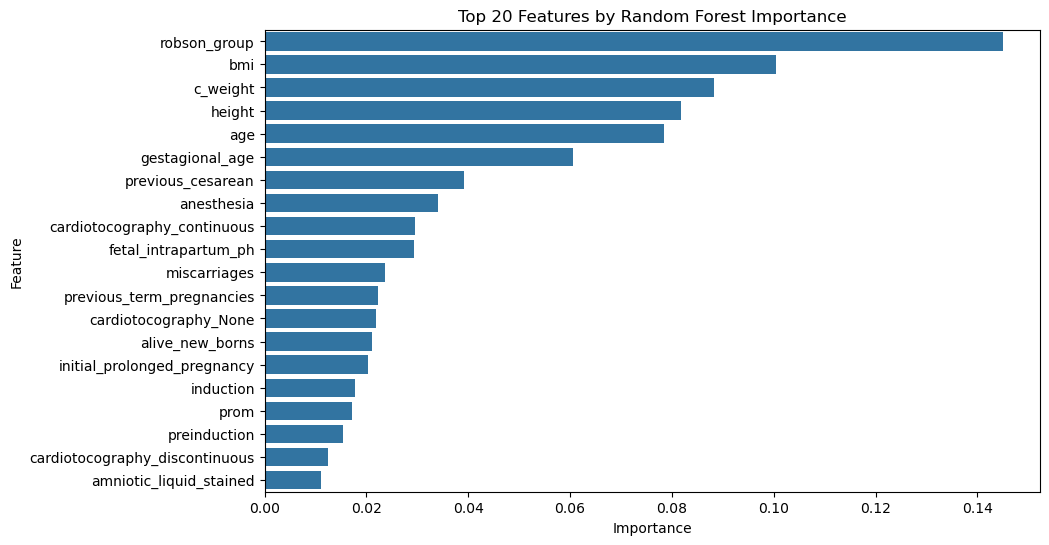

In [59]:
# Feature Importance from Random Forest
# Train a Random Forest model and extract feature importances
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 20 features by Random Forest Importance:")
print(feature_importance_df.head(20))

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Features by Random Forest Importance')
plt.show()

In [60]:
# Correlation with Target
# Calculate correlation of each feature with the target
correlation_with_target = X.corrwith(y)
correlation_with_target = correlation_with_target.sort_values(ascending=False)

print("\nTop 20 features by correlation with target:")
print(correlation_with_target.head(20))


Top 20 features by correlation with target:
cardiotocography_continuous       0.208147
gestagional_age                   0.123934
complications                     0.089344
height                            0.082193
previous_term_pregnancies         0.061718
alive_new_borns                   0.049924
polihidramnios                    0.027065
amniotic_liquid_clear             0.017325
stained_amniotic_liquor           0.004181
prolonged_pregnancy               0.003174
maternal_disease                  0.001505
toxoplasmosis                    -0.001245
maternal_anemia                  -0.002029
previous_fetal_losses            -0.004594
pregestational_type_i_diabetes   -0.006165
mild_preeclampsia                -0.006621
amniotic_liquid_stained          -0.008996
id_gestational_diabetes          -0.013447
iugr                             -0.015910
repeated_miscarriages            -0.016614
dtype: float64


In [61]:
# Final Feature Selection
# Combine results from all methods to select the most important features
final_features = set(selected_features_kbest).union(set(selected_features_rfe)).union(
    set(feature_importance_df.head(20)['Feature'])
)

print("\nFinal selected features:", len(final_features))

# Save the final selected features to a new variable
X_final = X[list(final_features)]
final_dataset = pd.concat([X_final, y], axis=1)

final_dataset


Final selected features: 28


,anesthesia,induction,prom,uterine_malformation,miomectomy,cardiotocography_discontinuous,initial_prolonged_pregnancy,bmi,gestagional_age,sifilis,alive_new_borns,malignant_tumor,preinduction,cardiotocography_None,miscarriages,height,previous_term_pregnancies,fetal_intrapartum_ph,complications,age,amniotic_liquid_stained,non_id_gestational_diabetes,gestational_hypertension,previous_cesarean,fetal_malformation,robson_group,c_weight,cardiotocography_continuous,type_of_birth
0,1,1,0,0,0,0,0,28.04,37,0,0,0,1,0,0,1.58,0,0,0,30,1,0,0,0,0,1,70.0,1,0
1,1,0,0,0,0,0,0,30.48,38,0,0,0,0,0,1,1.61,0,0,0,38,0,0,0,0,0,5,79.0,1,0
2,1,0,0,0,0,0,0,29.59,39,0,0,0,0,0,1,1.56,0,0,0,25,0,0,0,0,0,0,72.0,1,1
3,1,0,0,0,0,0,0,20.58,40,0,1,0,0,0,0,1.62,1,0,0,31,1,0,0,1,0,4,54.0,1,1
4,1,0,0,0,0,0,0,23.60,41,0,0,0,0,0,1,1.47,0,0,0,28,0,0,0,0,0,0,51.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6152,1,0,0,0,0,0,1,20.00,35,0,0,0,0,0,0,1.56,0,0,0,35,0,1,0,0,0,7,48.7,1,1
6153,1,0,1,0,0,0,0,21.51,40,0,1,0,0,0,0,1.64,1,0,0,29,0,0,0,0,0,2,57.9,1,1
6154,1,0,1,0,0,1,0,20.00,39,0,0,0,0,0,2,1.59,0,0,0,39,0,0,0,0,0,0,50.6,0,1
6155,1,1,0,0,0,0,1,23.28,39,1,0,0,0,0,2,1.48,1,1,0,41,0,0,0,0,0,1,51.0,1,0


# Model training and evaluation

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [64]:
# Create a DataFrame to store evaluation metrics
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])

final_dataset = final_dataset[sorted(final_dataset.columns)]
# Separate features (X) and target (y)
X = final_dataset.drop(columns=['type_of_birth'])
y = final_dataset['type_of_birth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for easier handling
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

In [65]:
X_train.columns

Index(['age', 'alive_new_borns', 'amniotic_liquid_stained', 'anesthesia',
       'bmi', 'c_weight', 'cardiotocography_None',
       'cardiotocography_continuous', 'cardiotocography_discontinuous',
       'complications', 'fetal_intrapartum_ph', 'fetal_malformation',
       'gestagional_age', 'gestational_hypertension', 'height', 'induction',
       'initial_prolonged_pregnancy', 'malignant_tumor', 'miomectomy',
       'miscarriages', 'non_id_gestational_diabetes', 'preinduction',
       'previous_cesarean', 'previous_term_pregnancies', 'prom',
       'robson_group', 'sifilis', 'uterine_malformation'],
      dtype='object')

In [66]:
# Function to evaluate models and save results
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Print results
    print(f"**{model_name}**")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("------------------------------------")
    
    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Vaginal', 'Cesarean'], 
                yticklabels=['Vaginal', 'Cesarean'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Save results to DataFrame
    results_df.loc[len(results_df)] = [model_name, accuracy, precision, recall, f1, roc_auc]


Evaluating Logistic Regression...
**Logistic Regression**
Accuracy: 0.8602
Precision: 0.8768
Recall: 0.9663
F1-Score: 0.9194
ROC-AUC: 0.8530
Confusion Matrix:
[[ 77 137]
 [ 34 975]]
------------------------------------


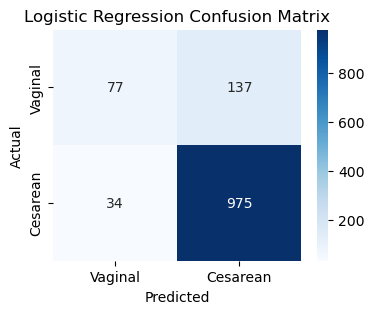


Evaluating Random Forest...
**Random Forest**
Accuracy: 0.8708
Precision: 0.8782
Recall: 0.9792
F1-Score: 0.9260
ROC-AUC: 0.8596
Confusion Matrix:
[[ 77 137]
 [ 21 988]]
------------------------------------


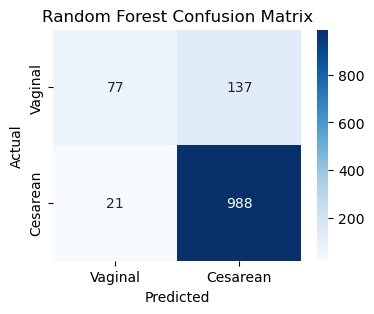


Evaluating Gradient Boosting...
**Gradient Boosting**
Accuracy: 0.8749
Precision: 0.8801
Recall: 0.9822
F1-Score: 0.9283
ROC-AUC: 0.8697
Confusion Matrix:
[[ 79 135]
 [ 18 991]]
------------------------------------


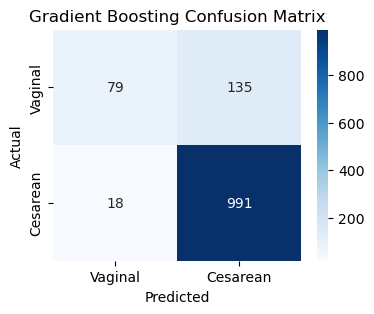


Evaluating Support Vector Machine...
**Support Vector Machine**
Accuracy: 0.8684
Precision: 0.8681
Recall: 0.9911
F1-Score: 0.9255
ROC-AUC: 0.8162
Confusion Matrix:
[[  62  152]
 [   9 1000]]
------------------------------------


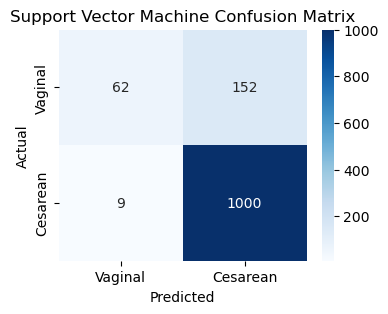

In [67]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True, random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    trained_model = evaluate_model(model, X_train, X_test, y_train, y_test, name)

In [68]:
results_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.860180,0.876799,0.966303,0.919378,0.852977
1,Random Forest,0.870809,0.878222,0.979187,0.925961,0.859605
2,Gradient Boosting,0.874898,0.880107,0.982161,0.928337,0.869652
3,Support Vector Machine,0.868357,0.868056,0.991080,0.925497,0.816187


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.05}
**Gradient boosting**
Accuracy: 0.8757
Precision: 0.8789
Recall: 0.9851
F1-Score: 0.9290
ROC-AUC: 0.8738
Confusion Matrix:
[[ 77 137]
 [ 15 994]]
------------------------------------


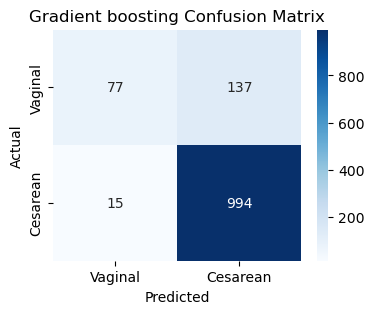

In [69]:
from sklearn.model_selection import  RandomizedSearchCV

# Example: Tuning Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 5, 7, 9],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for splits
}

# Initialize the model
gb = GradientBoostingClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter combinations to try
    scoring='roc_auc',  # Metric to optimize
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=1
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters found:", random_search.best_params_)
best_model = random_search.best_estimator_

# Evaluate the tuned model
evaluate_model(best_model, X_train, X_test, y_train, y_test, 'Gradient boosting')

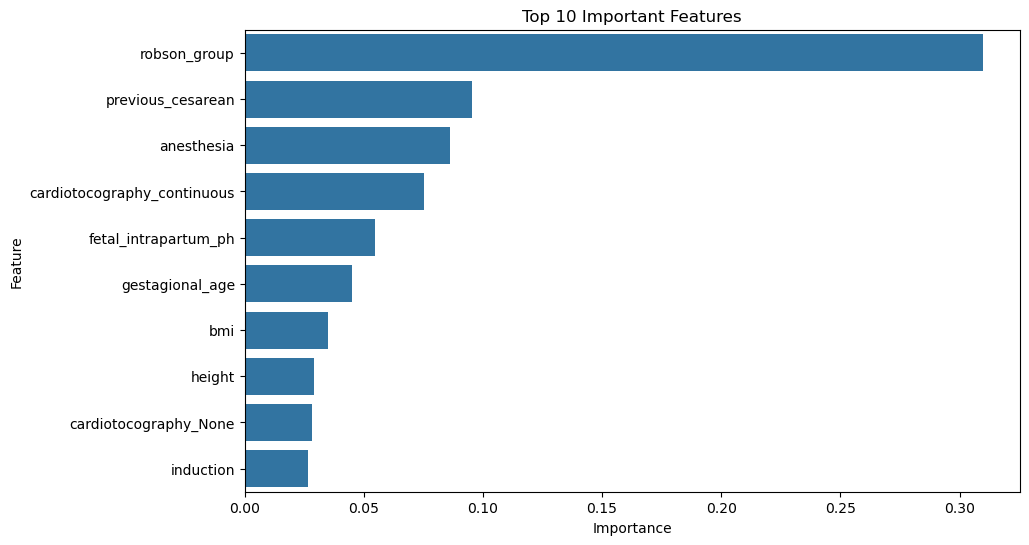

In [70]:
# Plot feature importances (for Random Forest or Gradient Boosting)
importances = best_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [71]:
import joblib

# Save the model
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


In [72]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']